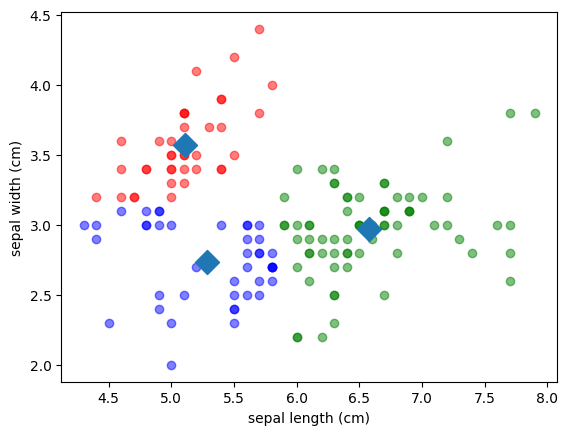

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy

iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

def distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = (one + two) ** 0.5
  return distance

# A function that assigns the nearest centroid to a sample
def assign_to_centroid(sample, centroids):
  k = len(centroids)
  distances = np.zeros(k)
  for i in range(k):
    distances[i] = distance(sample, centroids[i])
  closest_centroid = np.argmin(distances)
  return closest_centroid

# To store the value of centroids when it updates
centroids_old = np.zeros(centroids.shape)

# Cluster labeles (either 0, 1, or 2)
labels = np.zeros(len(samples))

distances = np.zeros(3)

# Initialize error:
error = np.zeros(3)

for i in range(k):
  error[i] = distance(centroids[i], centroids_old[i])

# Repeat Steps 2 and 3 until convergence:

while error.all() != 0:

  # Step 2: Assign samples to nearest centroid

  for i in range(len(samples)):
    labels[i] = assign_to_centroid(samples[i], centroids)

  # Step 3: Update centroids

  centroids_old = deepcopy(centroids)

  for i in range(k):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)
    error[i] = distance(centroids[i], centroids_old[i])

colors = ['r', 'g', 'b']

for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()
